In [9]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [10]:
os.getcwd()

'c:\\Users\\gjric\\Desktop\\mlproject\\src\\Notebooks'

In [12]:
df = pd.read_csv("c:/Users/gjric/Desktop/mlproject/data/OTT_curated_dataset.csv")

In [13]:
df.info()
df.isna().mean().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   age                10000 non-null  int64  
 2   gender             10000 non-null  object 
 3   country            10000 non-null  object 
 4   join_date          10000 non-null  object 
 5   membership_type    10000 non-null  object 
 6   devices_owned      10000 non-null  int64  
 7   profile_count      10000 non-null  int64  
 8   is_active          10000 non-null  int64  
 9   avg_watch_minutes  10000 non-null  float64
 10  avg_sessions       10000 non-null  float64
 11  binge_days         10000 non-null  int64  
 12  active_days        10000 non-null  int64  
 13  late_ratio         10000 non-null  float64
 14  payment_count      10000 non-null  int64  
 15  avg_amount_due     10000 non-null  float64
 16  avg_amount_paid    1000

customer_id          0.0
age                  0.0
gender               0.0
country              0.0
join_date            0.0
membership_type      0.0
devices_owned        0.0
profile_count        0.0
is_active            0.0
avg_watch_minutes    0.0
avg_sessions         0.0
binge_days           0.0
active_days          0.0
late_ratio           0.0
payment_count        0.0
avg_amount_due       0.0
avg_amount_paid      0.0
ticket_count         0.0
avg_resolution       0.0
unresolved_count     0.0
churn                0.0
dtype: float64

In [14]:
churn_rate = df["churn"].mean()
print(f"Churn Rate: {churn_rate:.2%}")

df["churn"].value_counts(normalize=True)


Churn Rate: 61.63%


churn
1    0.6163
0    0.3837
Name: proportion, dtype: float64

In [15]:
df.groupby("membership_type")["churn"].mean().sort_values(ascending=False)


membership_type
Basic       0.688235
Standard    0.583544
Premium     0.532686
Name: churn, dtype: float64

In [16]:
df.groupby("churn")["avg_watch_minutes"].mean()


churn
0    86.212108
1    77.445113
Name: avg_watch_minutes, dtype: float64

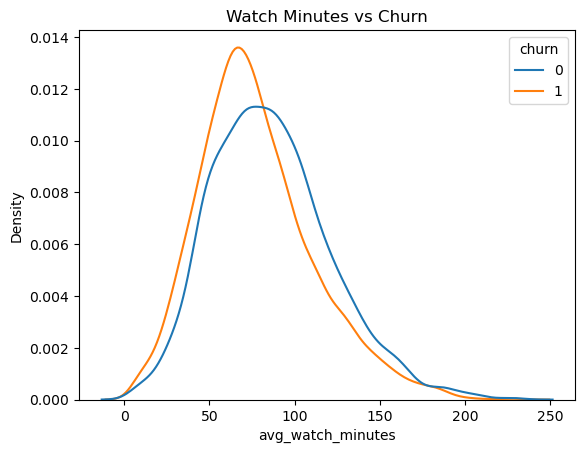

In [17]:
sns.kdeplot(
    data=df, x="avg_watch_minutes", hue="churn", common_norm=False
)
plt.title("Watch Minutes vs Churn")
plt.show()


In [18]:
df.groupby("churn")[["avg_sessions", "binge_days"]].mean()


,avg_sessions,binge_days
churn,,
0,2.124200,7.707584
1,2.127276,5.441344


In [19]:
df.groupby("churn")["late_ratio"].mean()


churn
0    0.045300
1    0.061337
Name: late_ratio, dtype: float64

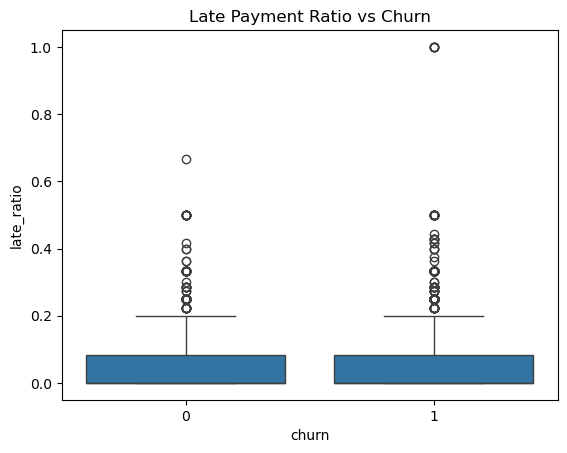

In [20]:
sns.boxplot(data=df, x="churn", y="late_ratio")
plt.title("Late Payment Ratio vs Churn")
plt.show()


In [21]:
df.groupby("churn")[["ticket_count", "avg_resolution"]].mean()


,ticket_count,avg_resolution
churn,,
0,0.532968,7.785172
1,0.590621,8.653022


In [22]:
df["join_date"] = pd.to_datetime(df["join_date"])
df["tenure_days"] = (pd.Timestamp("2024-12-31") - df["join_date"]).dt.days


In [23]:
df.groupby("churn")["tenure_days"].mean()


churn
0    555.765442
1    573.721402
Name: tenure_days, dtype: float64

In [24]:
df["tenure_bucket"] = pd.cut(
    df["tenure_days"],
    bins=[0, 90, 180, 365, 720, 1500],
    labels=["<3m","3–6m","6–12m","1–2y","2y+"]
)

df.groupby("tenure_bucket")["churn"].mean()


C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\3237340091.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_bucket")["churn"].mean()


tenure_bucket
<3m      0.627451
3–6m     0.594132
6–12m    0.590935
1–2y     0.611520
2y+      0.636137
Name: churn, dtype: float64

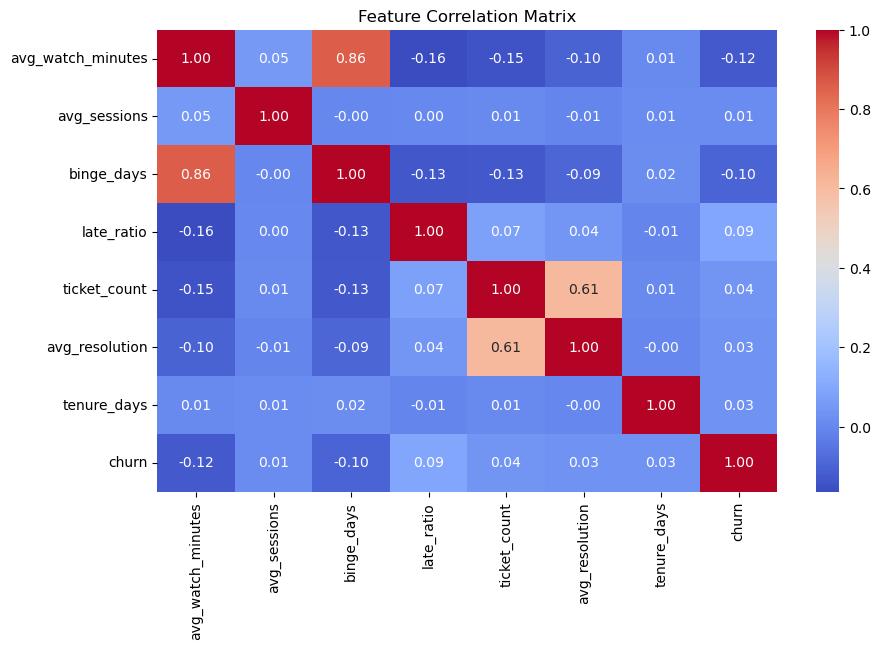

In [25]:
num_cols = [
    "avg_watch_minutes",
    "avg_sessions",
    "binge_days",
    "late_ratio",
    "ticket_count",
    "avg_resolution",
    "tenure_days",
    "churn"
]

corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [26]:
df["watch_bucket"] = pd.qcut(
    df["avg_watch_minutes"],
    q=5,
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

df.groupby("watch_bucket")["churn"].mean()


C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\1227244735.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("watch_bucket")["churn"].mean()


watch_bucket
Very Low     0.685157
Low          0.678339
Medium       0.636500
High         0.547000
Very High    0.534500
Name: churn, dtype: float64

<Axes: xlabel='watch_bucket', ylabel='churn'>

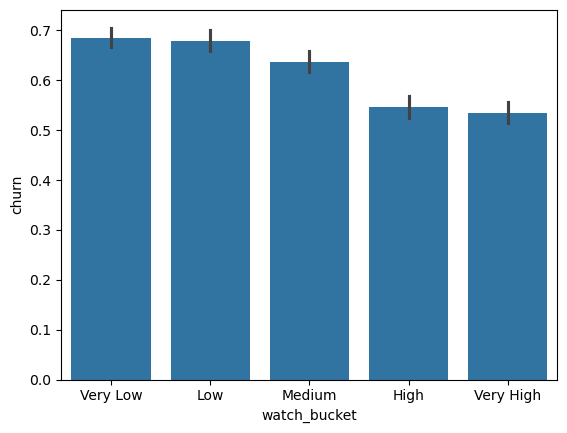

In [27]:
import seaborn as sns
sns.barplot(
    x="watch_bucket", y="churn", data=df, order=df["watch_bucket"].cat.categories
)


In [28]:
df["late_bucket"] = pd.cut(
    df["late_ratio"],
    bins=[0, 0.05, 0.15, 0.3, 1.0],
    labels=["No Issues", "Minor", "Moderate", "Severe"]
)

df.groupby("late_bucket")["churn"].mean()


C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\4095023433.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("late_bucket")["churn"].mean()


late_bucket
No Issues         NaN
Minor        0.635390
Moderate     0.712538
Severe       0.736527
Name: churn, dtype: float64

In [29]:
pd.pivot_table(
    df,
    values="churn",
    index="membership_type",
    columns="watch_bucket",
    aggfunc="mean"
)


C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\2976270874.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


watch_bucket,Very Low,Low,Medium,High,Very High
membership_type,,,,,
Basic,0.704501,0.697749,0.669767,0.644501,0.615385
Premium,0.631579,0.611765,0.586387,0.512690,0.520715
Standard,0.620438,0.650746,0.616438,0.526749,0.552301


In [30]:
df["low_usage"] = (df["avg_watch_minutes"] < 60).astype(int)
df["payment_issue"] = (df["late_ratio"] > 0.1).astype(int)

pd.pivot_table(
    df,
    values="churn",
    index="low_usage",
    columns="payment_issue",
    aggfunc="mean"
)


payment_issue,0,1
low_usage,,
0,0.574963,0.697303
1,0.657776,0.732456


In [31]:
def information_value(df, feature, target="churn", bins=10):
    df = df[[feature, target]].copy()
    df[feature] = pd.qcut(df[feature], bins, duplicates="drop")
    
    grouped = df.groupby(feature)[target]
    good = grouped.count() - grouped.sum()
    bad = grouped.sum()
    
    dist_good = good / good.sum()
    dist_bad = bad / bad.sum()
    
    iv = ((dist_good - dist_bad) * np.log(dist_good / dist_bad)).sum()
    return iv


In [32]:
features = [
    "avg_watch_minutes",
    "avg_sessions",
    "binge_days",
    "late_ratio",
    "ticket_count",
    "avg_resolution",
    "tenure_days"
]

iv_scores = {f: information_value(df, f) for f in features}
pd.Series(iv_scores).sort_values(ascending=False)


C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\1293612178.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target]
C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\1293612178.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(feature)[target]
C:\Users\gjric\AppData\Local\Temp\ipykernel_48320\1293612178.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped =

avg_watch_minutes    0.085269
binge_days           0.066921
late_ratio           0.037609
avg_resolution       0.009725
avg_sessions         0.008353
tenure_days          0.007070
ticket_count         0.002846
dtype: float64